In [ ]:
#Practical Assignment No: 03
#To Implement Image classification model using CNN Deep Learning Architecture.
#dataset: fashion_mnist

In [1]:
# importing the libraries
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

In [7]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


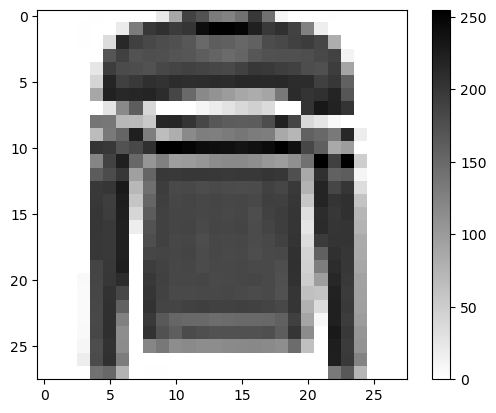

In [15]:
plt.figure()
plt.imshow(train_images[5],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

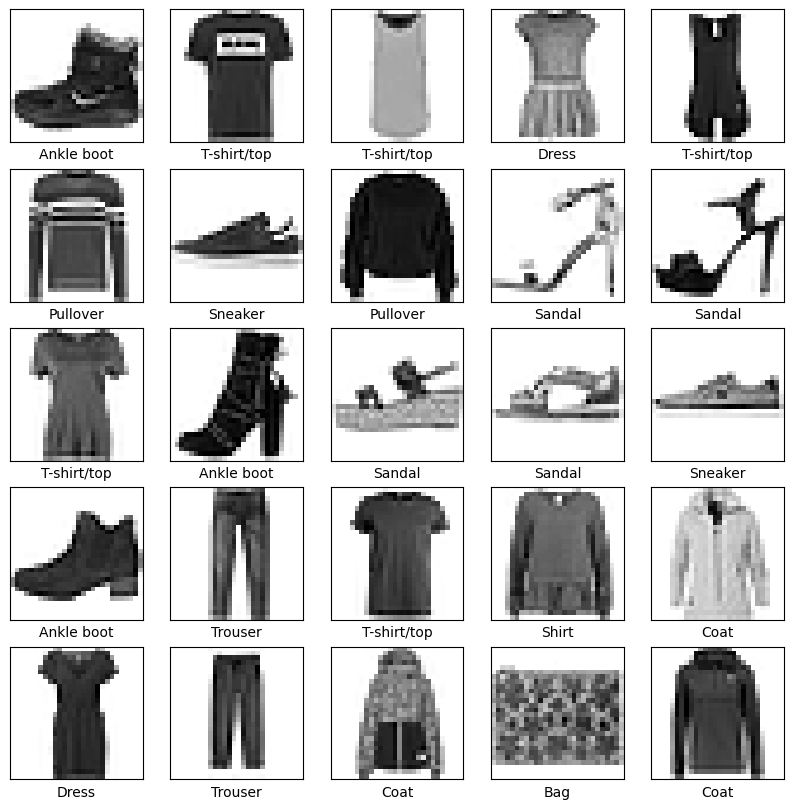

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [31]:
print("train_images: ", train_images.shape)
print("test_images:  ", test_images.shape)

train_images:  (60000, 28, 28, 1)
test_images:   (10000, 28, 28, 1)


In [39]:
model= keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
])

In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model_history = model.fit(train_images, train_labels,  batch_size=50, epochs=10, validation_split=0.3)

Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 117s 133ms/step - accuracy: 0.7076 - loss: 0.8125 - val_accuracy: 0.8733 - val_loss: 0.3493
Epoch 2/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 115s 136ms/step - accuracy: 0.8766 - loss: 0.3533 - val_accuracy: 0.8930 - val_loss: 0.2935
Epoch 3/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 124s 147ms/step - accuracy: 0.8951 - loss: 0.2924 - val_accuracy: 0.8920 - val_loss: 0.2930
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 139s 143ms/step - accuracy: 0.9075 - loss: 0.2524 - val_accuracy: 0.9092 - val_loss: 0.2483
Epoch 5/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 146s 148ms/step - accuracy: 0.9193 - loss: 0.2239 - val_accuracy: 0.9044 - val_loss: 0.2561
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 130s 133ms/step - accuracy: 0.9241 - loss: 0.2093 - val_accuracy: 0.9196 - val_loss: 0.2346
Epoch 7/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 115s 137ms/step - accuracy: 0.9313 - loss: 0.1856 - val_accuracy: 0.9173 - val_loss: 0.2386
Epoch 8/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 115s 137ms/step - accuracy: 0.9395 -

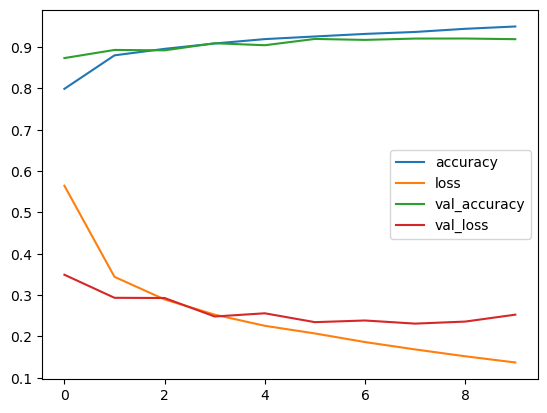

In [45]:
pd.DataFrame(model_history.history).plot()
plt.show()

In [47]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 6s - 19ms/step - accuracy: 0.9144 - loss: 0.2742

Test accuracy: 0.9143999814987183


In [49]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [51]:
def plot_img_label(img, pred_class, pred_percentage, true_class):

  plt.imshow(img,cmap=plt.cm.binary)

  if pred_class == true_class:
    color = 'blue'
  else:
    color = 'red'

  plt.title(label= f"Predicted: {pred_class} - {pred_percentage:2.1f}%\nActual: {true_class}", 
            fontdict={'color': color})
            

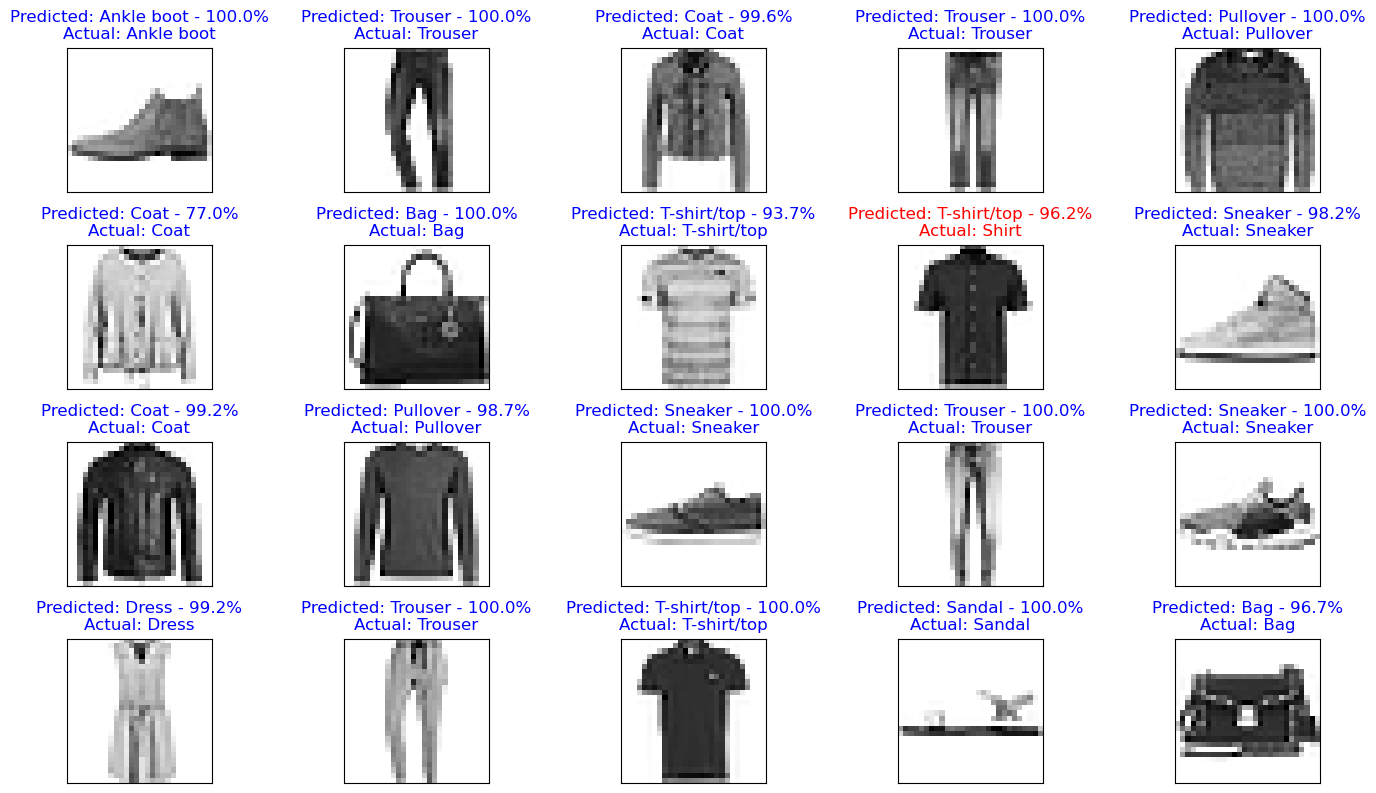

In [53]:
plt.figure(figsize=(14,10))
for i in range(20):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    i = i * 5

    img = test_images[i].reshape(28,28)
    pred_class = class_names[np.argmax(predictions[i])]
    pred_percentage = np.max(predictions[i])*100
    true_class = class_names[np.argmax(test_labels[i])]
    
    plot_img_label(img, pred_class, pred_percentage, true_class)

plt.tight_layout()
plt.show()

In [57]:
predicted_label = np.argmax(predictions,axis = 1)
true_label = np.argmax(test_labels, axis = 1)

In [59]:
print(classification_report(true_label, predicted_label, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.82      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.87      0.86      0.87      1000
       Dress       0.89      0.95      0.92      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.75      0.78      0.76      1000
     Sneaker       0.97      0.94      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [61]:
#https://deepnote.com/app/meryem-mahmoud/Classifying-Images-of-Clothing-Using-TensorFlow-db20e7c1-e3b3-4d56-a059-17e8ce061c91